In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
inspector = inspect(engine)

In [6]:
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)
# reflect the tables
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [8]:
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [9]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#print(type(measurement_data))
# measurement_data["date"] = pd.to_datetime(measurement_data["date"], "%Y-%m-%d")
# measurement_data["date"] = dt.datetime.strptime(measurement_data["date"], "%Y-%m-%d")

In [14]:
earliest_date = session.query(Measurement.date).first()
earliest_date

('2010-01-01')

In [15]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [16]:
type(latest_date)

sqlalchemy.util._collections.result

In [17]:
latest_date[0]

'2017-08-23'

In [18]:
latest_date_dt = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")

In [19]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8152172820>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01'}

In [20]:
year_earlier = dt.date(latest_date_dt.year-1, latest_date_dt.month, latest_date_dt.day)

In [21]:
year_earlier

datetime.date(2016, 8, 23)

In [22]:
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= (year_earlier)).all()

In [23]:
#last_12_months_res = last_12_months_res[::-1]

In [56]:
type(last_12_months)

list

In [25]:
for result in last_12_months:
    print(result)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-06-08', 0.0)
('2017-06-09', 0.02)
('2017-06-10', 0.62)
('2017-06-11', 0.74)
('2017-06-12', 0.24)
('2017-06-13', 0.24)
('2017-06-14', 0.22)
('2017-06-15', 0.55)
('2017-06-16', 0.06)
('2017-06-17', 0.07)
('2017-06-18', 0.24)
('2017-06-19', 0.08)
('2017-06-20', 0.0)
('2017-06-21', 0.19)
('2017-06-22', 0.06)
('2017-06-23', 0.12)
('2017-06-24', 0.36)
('2017-06-25', 0.02)
('2017-06-26', 0.06)
('2017-06-27', 0.01)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.01)
('2017-07-01', 0.08)
('2017-07-02', 0.15)
('2017-07-03', 0.15)
('2017-07-04', 0.08)
('2017-07-05', 0.0)
('2017-07-06', 0.0)
('2017-07-07', 0.18)
('2017-07-08', 0.0)
('2017-07-09', 0.11)
('2017-07-10', 0.02)
('2017-07-11', 0.02)
('2017-07-12', 0.28)
('2017-07-13', 0.32)
('2017-07-14', 0.2)
('2017-07-15', 0.05)
('2017-07-16', 0.1)
('2017-07-17', 0.21)
('2017-07-18', 0.05)
('2017-07-19', 0.05)
('2017-07-20', 0.06)
('2017-07-21', 0.03)
('2017-07-22', 0.2)
('2017-07-23', 0.2)
('2017-07-24', 0.61)
('2017-07-25', 0.11)
('2

In [26]:
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df = last_12_months_df.set_index("date")
last_12_months_df = last_12_months_df.sort_index(ascending=True)
last_12_months_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


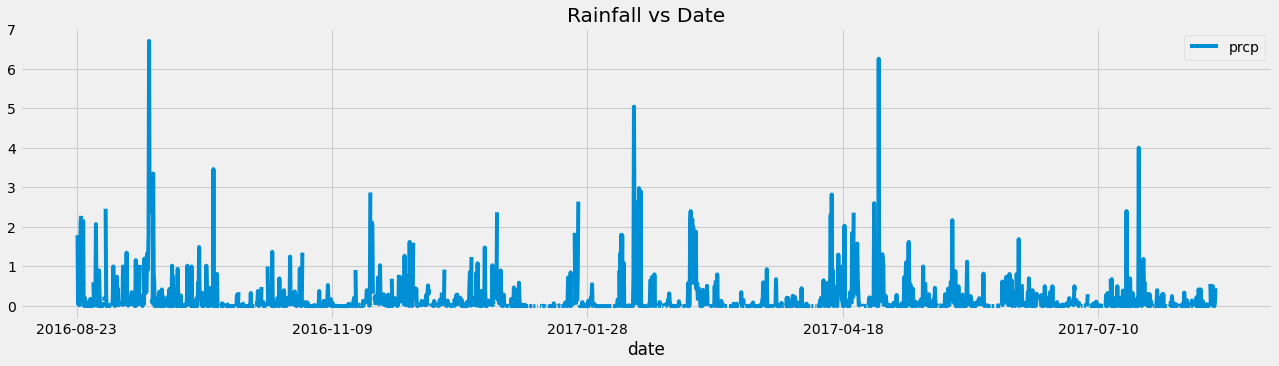

In [27]:
last_12_months_df.plot(figsize=(20, 5), title="Rainfall vs Date")

## Need to add a y axis label ***

In [28]:
# plt.plot(last_12_months_df.index, last_12_months_df["prcp"])
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.show()

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

    
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_months_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
columns = inspector.get_columns("station")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [32]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).group_by(Station.station).count()
station_count

9

In [147]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).all()
active_stations

## Need to sort by descending order ***

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [138]:
type(active_stations)

list

In [80]:
active_stations[6][0]

'USC00519281'

In [115]:
# Using the most active station id from the previous query, 
# calculate the lowest, highest, and average temperature.
most_active_station = active_stations[6][0]
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]

print(f"Station: {most_active_station}")
print(f"Lowest temp: {min_temp}")
print(f"Highest temp: {max_temp}")
print(f"Average temp: {avg_temp}")

Station: USC00519281
Lowest temp: 54.0
Highest temp: 85.0
Average temp: 71.66378066378067


In [117]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= (year_earlier)).all()

In [118]:
most_active_year_data_df = pd.DataFrame(most_active_year_data)
most_active_year_data_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


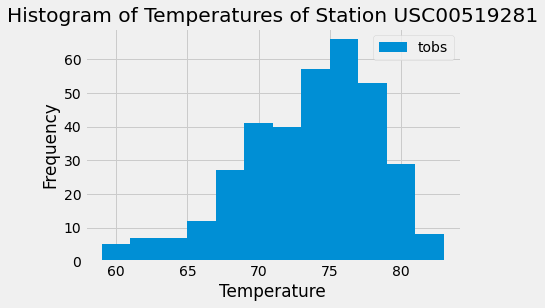

In [128]:
plt.hist(most_active_year_data_df["tobs"], bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Histogram of Temperatures of Station {most_active_station}")
plt.legend()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()